In [1]:
# Importing the "drive" module from the "google.colab" package
from google.colab import drive
# Mounting the user's Google Drive at the "/content/drive" directory
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing the current working directory to 'drive/MyDrive/Deep Learning (COMP47650)/Term_project'
%cd drive/MyDrive/Deep Learning (COMP47650)/Term_project

/content/drive/MyDrive/Deep Learning (COMP47650)/Term_project


In [ ]:
# install requirements from the requirements.txt file
!pip install -q -r requirements.txt

### Import configuration file (yaml)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the PyYAML module to work with YAML files
import yaml
# Opening the 'config.yaml' file in read mode and loading its contents into a dictionary called 'config'
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)


### Import Libraries

In [ ]:
# Import libries which are being used in the python file.
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re

import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import torch

from torch.utils.data import TensorDataset

from keras.layers import LSTM,Dense,Bidirectional,Input
import tensorflow as tf
from keras.models import Model

import transformers
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')


from utils import eda

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Dataset & defining variables

In [ ]:
#load from local
imdb_dataset_df = pd.read_csv(config['dataset']['local_path'] + "/IMDB Dataset.csv")

# load from drive
#imdb_dataset_df = pd.read_csv(config.google_drive_path + "IMDB Dataset.csv/IMDB Dataset.csv")

drive_or_local = 'local_path' #google_drive_path
data_path = config['dataset'][drive_or_local] + "/IMDB Dataset.csv"

fig_folder = config['fig_folder']['folder_path']

### EDA:

In [ ]:
# import eda script from utils module.
from utils import eda

In [ ]:
# decribe the data set
eda.decribeDataSet(data_path)

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
# Calling a function 'getDataCounts' from a module named 'eda' to get the counts of each unique value in the 'sentiment' column
sentiment_counts = eda.getDataCounts(data_path, 'sentiment')

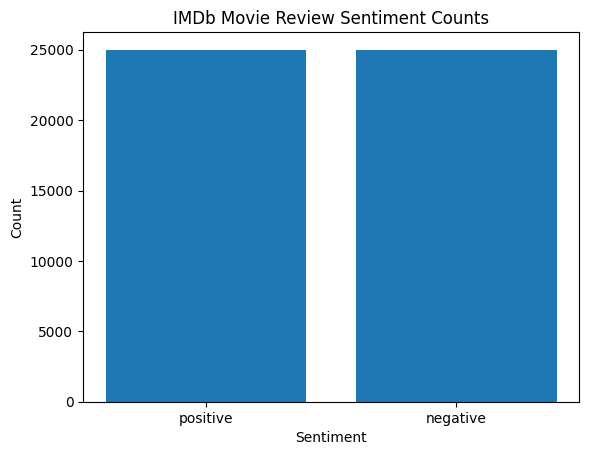

In [ ]:
# Calling a function 'plotBarChart' from a module named 'eda' to create a bar chart of sentiment counts and saving the figure in 'fig_folder'
eda.plotBarChart(sentiment_counts, 'Sentiment', 'Count', 'IMDb Movie Review Sentiment Counts', fig_folder)


    It's clearly visible that dataset is balanced.

------

#### Using pre-trained model, checking 500 samples prediction

In [ ]:
# Calling a function 'getSamples' from a module named 'eda' to get a random sample of 500 records from a dataset located at 'data_path'
sample_data = eda.getSamples(data_path, 500)

In [ ]:
# Adding a new column to the 'sample_data' DataFrame containing GPT predictions of the sentiment of each review
sample_data['gpt_prediction'] = sample_data['review'].apply(lambda x: eda.predict_sentiment(x, config['pre_trained_model_GPT']))

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

In [ ]:
# Adding a new column to the 'sample_data' DataFrame containing BERT predictions of the sentiment of each review
sample_data['bert_prediction'] = sample_data['review'].apply(lambda x: eda.predict_bert_sentiment(x, config['pre_trained_model_BERT']))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
sample_data

,review,sentiment,gpt_prediction,bert_prediction
0,One of the other reviewers has mentioned that ...,positive,positive,negative
1,A wonderful little production. <br /><br />The...,positive,negative,positive
2,I thought this was a wonderful way to spend ti...,positive,negative,negative
3,Basically there's a family where a little boy ...,negative,positive,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,negative,negative
...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative,positive,positive
496,"First off, I have to say that I loved the book...",negative,positive,positive
497,This movie was extremely boring. I only laughe...,negative,positive,negative
498,I was disgusted by this movie. No it wasn't be...,negative,negative,negative


In [ ]:
# Saving the 'sample_data' DataFrame to a CSV file located at 'config['dataset']['local_path'] + "/sample_data_500.csv"'
sample_data.to_csv(config['dataset']['local_path'] + "/sample_data_500.csv")

### Analysis Between GPT and BERT Pre-Trained model without training on dataset

##### Convert sentiments column to binary

In [ ]:
# Calling 'convertLabelsTOBinary' function from the 'eda' module to convert the 'sentiment', 'gpt_prediction', and 'bert_prediction' columns of the 'sample_data' DataFrame to binary labels
sample_data = eda.convertLabelsTOBinary(sample_data, 'sentiment')
sample_data = eda.convertLabelsTOBinary(sample_data, 'gpt_prediction')
sample_data = eda.convertLabelsTOBinary(sample_data, 'bert_prediction')


In [ ]:
sample_data

,review,sentiment,gpt_prediction,bert_prediction
0,One of the other reviewers has mentioned that ...,1,1,0
1,A wonderful little production. <br /><br />The...,1,0,1
2,I thought this was a wonderful way to spend ti...,1,0,0
3,Basically there's a family where a little boy ...,0,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,0,0
...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1,1
496,"First off, I have to say that I loved the book...",0,1,1
497,This movie was extremely boring. I only laughe...,0,1,0
498,I was disgusted by this movie. No it wasn't be...,0,0,0


In [ ]:
# Defining a list of column names to evaluate, then iterating through them and calling 'evaluate_models' function from the 'eda' module for each column

columnsName = ['gpt_prediction', 'bert_prediction']

metrics = []
for column in columnsName:
    metrics.append(eda.evaluate_models(sample_data, 'sentiment', column))

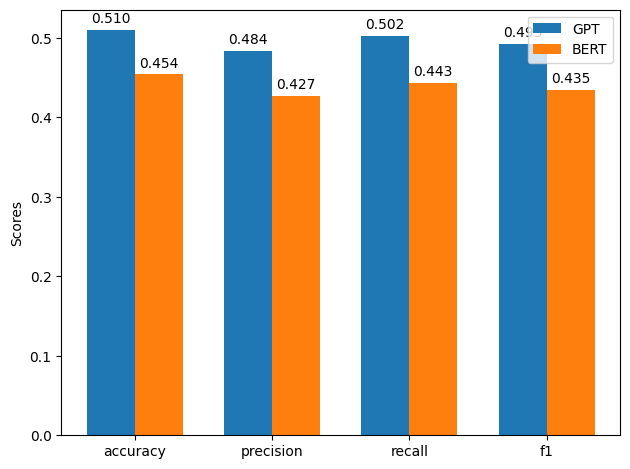

In [ ]:
eda.plot_metrics(metrics, fig_folder)

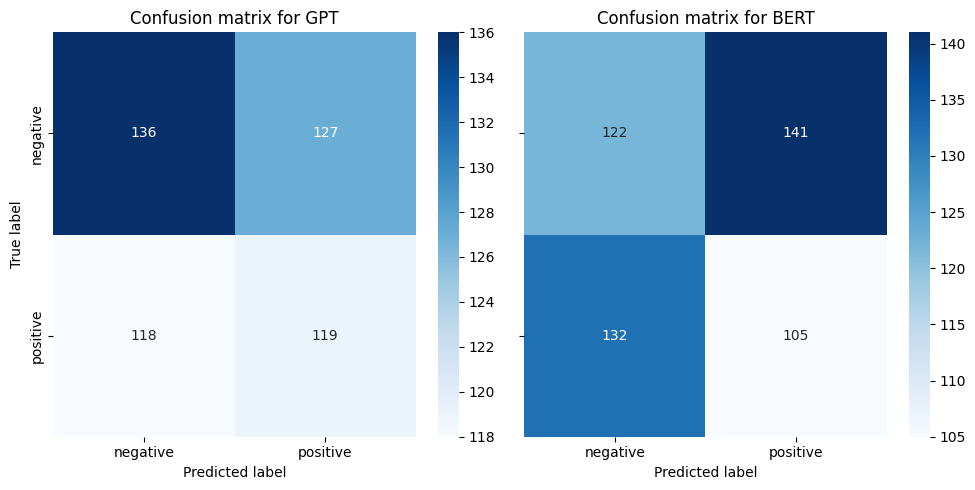

In [ ]:
eda.plot_confusion_matrices(sample_data, 'sentiment', 'gpt_prediction', 'bert_prediction', fig_folder)

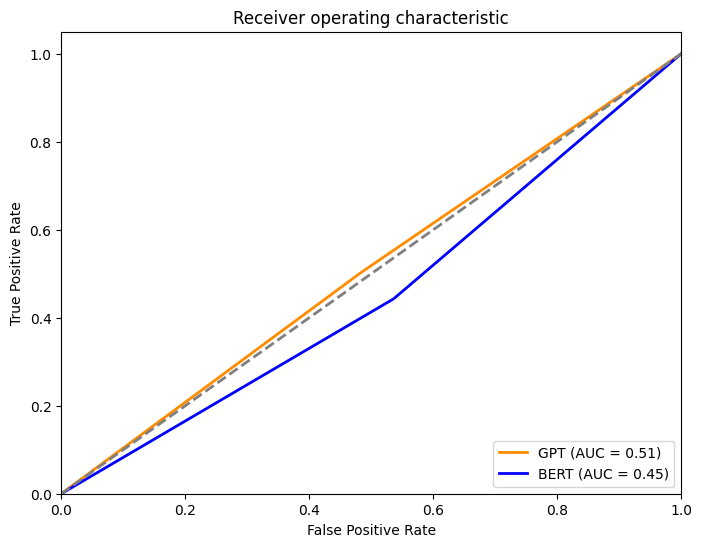

In [ ]:
eda.plot_roc_curves(sample_data, 'sentiment', 'gpt_prediction', 'bert_prediction',fig_folder)



---





### Data Preprocessing 

In [ ]:
# import preprocessing script file from the module
from utils import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
imdb_dataset_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative




*  Checking for Null Values



In [ ]:
# preprocessing check for null
val = preprocessing.checkForNull(imdb_dataset_df)
print(val)

review       Total null values in dataset: 0
sentiment    Total null values in dataset: 0
dtype: object


* Checking for duplicate values

In [ ]:
# preprocssing check for duplicate values
preprocessing.checkForDuplicated(imdb_dataset_df)

Number of duplicate rows: 418


* Remove duplicates

In [ ]:
# preprocssing to remove duplicate values
imdb_dataset_df = preprocessing.removeDuplicated(imdb_dataset_df)

* Removing URLs, HTML Tags, Mentions (@), converting to Lowercase

In [ ]:
# do cleaning method which all the sciprts is being called
imdb_dataset_df = preprocessing.doCleaning(imdb_dataset_df, 'review')

* Removing stop words, punctuations, text stemming

In [ ]:
# function to remove stop words, punctuation, text stemming
imdb_dataset_df = preprocessing.performCleaning(imdb_dataset_df, 'review')

### Splitting dataset into train and test

In [ ]:
# importing splittingdataset script from the module
from utils import splittingdataset

In [ ]:
# read the dataset and peform the ckeaing, if we require values later on instead of running all cell we can save the values in csv files
train_set, validation_set, test_set  = splittingdataset.train_test_val_split(imdb_dataset_df, test_size=config['split_dataset']['train_validate_ratio'], val_size=config['split_dataset']['test_validate_ratio'], random_state=config['split_dataset']['random_state'])

* Save to dataset folder, to fast up the process

In [ ]:
# train_set.to_csv('IMDB Dataset.csv/taining_set.csv')
# validation_set.to_csv('IMDB Dataset.csv/validation_set.csv')
# test_set.to_csv('IMDB Dataset.csv/test_set.csv')

* to load dataset from folder to increase the speed and not to perform spliting data everytime

In [ ]:
# Reading in three CSV files ('training_set.csv', 'validation_set.csv', and 'test_set.csv') and storing each in a separate DataFrame
train_set = pd.read_csv('IMDB Dataset.csv/taining_set.csv')
validation_set = pd.read_csv('IMDB Dataset.csv/validation_set.csv')
test_set = pd.read_csv('IMDB Dataset.csv/test_set.csv')

In [ ]:
# setting up small data to load faster
#train_set = train_set[:25000]
#validation_set = validation_set[:5000]

In [ ]:
# Converting the 'sentiment' column of each dataset to binary labels using the 'convertLabelsTOBinary' function from the 'eda' module
train_set = eda.convertLabelsTOBinary(train_set, 'sentiment')
validation_set= eda.convertLabelsTOBinary(validation_set, 'sentiment')
test_set = eda.convertLabelsTOBinary(test_set, 'sentiment')

* Training datas

In [ ]:
# Extracting the 'review' and 'sentiment' columns from the 'train_set' DataFrame and storing them in separate variables
x_train_set = train_set['review']
y_train_set = train_set['sentiment']

* validation datas

In [ ]:
# Extracting the 'review' and 'sentiment' columns from the 'validation_set' DataFrame and storing them in separate variables
x_validate_set = validation_set['review']
y_validate_set = validation_set['sentiment']

* Test datas

In [ ]:
# Extracting the 'review' and 'sentiment' columns from the 'test_set' DataFrame and storing them in separate variables
x_test_set = test_set['review']
y_test_set = test_set['sentiment']

### Training BERT Model

In [ ]:
#importing bert script from the module
from models import bert

* Tokenizing the inputs (x_train_set, x_validate_set):

In [ ]:
# Loading the pre-trained BERT model and tokenizer based on the specified configuration
model, tokenizer, fast_tokenizer = bert.chooseTrained_Model_Tokenizer(config['bert_training_model'])

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initi

In [ ]:
# Encoding the text data using the BERT tokenizer and truncating it to a maximum length of 200 tokens
x_train_set = bert.encoder(x_train_set.values, fast_tokenizer, maxlen=200)
x_validate_set = bert.encoder(x_validate_set.values, fast_tokenizer, maxlen=200)

* Building Model:

In [ ]:
# Building the BERT model for training based on the specified configuration and displaying its summary
model, checkpoint = bert.build_model_for_training(model, config['bert_training_model'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_tokens (InputLay  [(None, 200)]            0         
 er)                                                             
                                                                 
 tf_distil_bert_model_1 (TFD  TFBaseModelOutput(last_h  66362880 
 istilBertModel)             idden_state=(None, 200,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_1   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 769 

* Training Model and logging details:

In [ ]:
# get logger to log the training values
logger = bert.getLogger()

* Training on 5 Epochs

In [ ]:
# Training the BERT model for 5 epochs and saving the model weights using the checkpoint
hist_5 = model.fit(x_train_set,y_train_set, batch_size = 32 ,validation_data=(x_validate_set,y_validate_set),epochs = 5,  callbacks=[checkpoint])

Epoch 1/5
1085/1085 [==============================] - ETA: 0s - loss: 0.7111 - accuracy: 0.4987
Epoch 1: val_loss improved from inf to 0.69399, saving model to checkpoints/bert/Bert_model_checkpoint.h5
1085/1085 [==============================] - 877s 787ms/step - loss: 0.7111 - accuracy: 0.4987 - val_loss: 0.6940 - val_accuracy: 0.5008
Epoch 2/5
1085/1085 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.4977
Epoch 2: val_loss did not improve from 0.69399
1085/1085 [==============================] - 847s 781ms/step - loss: 0.7006 - accuracy: 0.4977 - val_loss: 0.6976 - val_accuracy: 0.5008
Epoch 3/5
1085/1085 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5004
Epoch 3: val_loss improved from 0.69399 to 0.69341, saving model to checkpoints/bert/Bert_model_checkpoint.h5
1085/1085 [==============================] - 852s 786ms/step - loss: 0.6948 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.5008
Epoch 4/5
1085/1085 [==============

In [ ]:
# log the required information
bert.maintainlog(logger, hist_5)

INFO:training_logs:{'model_name': 'bert', 'accuracy': [0.49866020679473877, 0.49773821234703064, 0.5003601312637329, 0.5018007755279541, 0.49935171008110046], 'loss': [0.7110758423805237, 0.7005633115768433, 0.6948214769363403, 0.6941755414009094, 0.6937828063964844], 'val_accuracy': [0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.49917641282081604], 'val_loss': [0.6939939260482788, 0.6975947022438049, 0.6934089064598083, 0.6931525468826294, 0.6931651830673218]}


* Training on 10 Epochs

In [ ]:
# Training the BERT model for 10 epochs and saving the model weights using the checkpoint
hist_10 = model.fit(x_train_set,y_train_set, batch_size = 32 ,validation_data=(x_validate_set,y_validate_set),epochs = 10,  callbacks=[checkpoint])

Epoch 1/10
1085/1085 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4973
Epoch 1: val_loss did not improve from 0.69315
1085/1085 [==============================] - 848s 781ms/step - loss: 0.6939 - accuracy: 0.4973 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 2/10
1085/1085 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5029
Epoch 2: val_loss did not improve from 0.69315
1085/1085 [==============================] - 850s 783ms/step - loss: 0.6936 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 3/10
1085/1085 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4941
Epoch 3: val_loss did not improve from 0.69315
1085/1085 [==============================] - 850s 783ms/step - loss: 0.6937 - accuracy: 0.4941 - val_loss: 0.6936 - val_accuracy: 0.4992
Epoch 4/10
1085/1085 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4966
Epoch 4: val_loss did not improve from 0.69315
1085/1085

In [ ]:
# log the required information
bert.maintainlog(logger, hist_5)

INFO:training_logs:{'model_name': 'bert', 'accuracy': [0.4972772002220154, 0.5028956532478333, 0.49413663148880005, 0.4966145157814026, 0.504365086555481, 0.4951450824737549, 0.49768057465553284, 0.4988042712211609, 0.5042786598205566, 0.5002449154853821], 'loss': [0.6939319968223572, 0.6935869455337524, 0.693701446056366, 0.6937124729156494, 0.6934537291526794, 0.6937349438667297, 0.6937499046325684, 0.6936048269271851, 0.6935125589370728, 0.6935793161392212], 'val_accuracy': [0.5008236169815063, 0.49917641282081604, 0.49917641282081604, 0.49917641282081604, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.49917641282081604, 0.49917641282081604], 'val_loss': [0.6935403943061829, 0.6931754350662231, 0.6935928463935852, 0.6932739019393921, 0.6967124342918396, 0.693149745464325, 0.693702757358551, 0.6931545734405518, 0.6931518912315369, 0.6931678056716919]}


In [ ]:
# log the required information for 10 epoch
bert.maintainlog(logger, hist_10)

In [ ]:
# save the model
model.save("saved_models/bert/bert_model.h5")

* Analysis on Training:

In [ ]:
# import analysis scripte from the utils module
from utils import model_analysis as ma

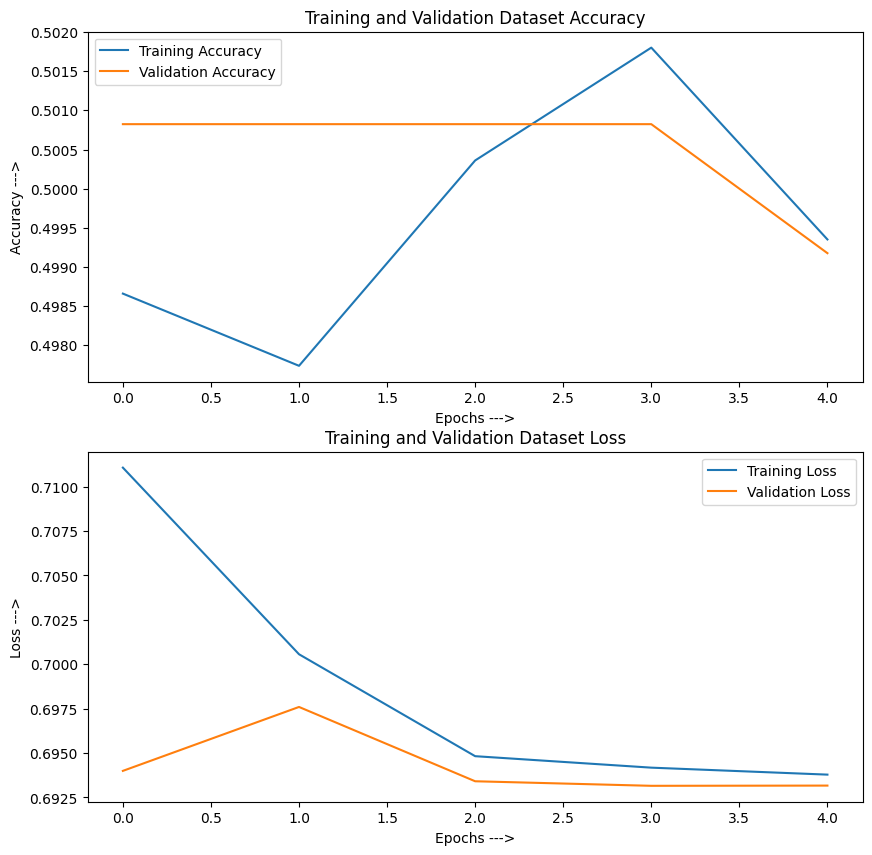

In [ ]:
# plot the line accuracy graph
ma.plot_history(hist_5,fig_folder, 'bert_AccuracyVsLoss_Epoch_5')

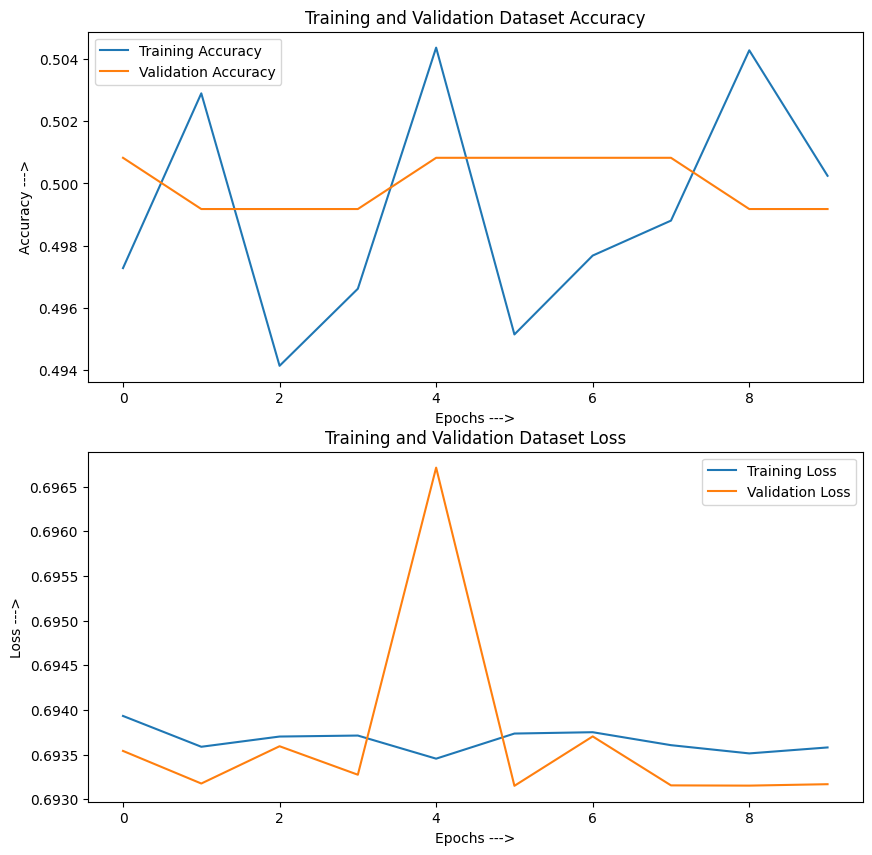

In [ ]:
# plot the line accuracy graph
ma.plot_history(hist_10,fig_folder,'bert_AccuracyVsLoss_Epoch_10')

* Prediction:

In [ ]:
# predict the test values from model that is trainied
pred = bert.predict(x_test_set, fast_tokenizer, model)

67/67 [==============================] - 14s 212ms/step


* Prediction Analysis:

In [ ]:
# print the classification report
print(ma.getClassificationReport(y_test_set, pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1101
           1       0.00      0.00      0.00      1025

    accuracy                           0.52      2126
   macro avg       0.26      0.50      0.34      2126
weighted avg       0.27      0.52      0.35      2126



passing df to get confusion matrix

In [ ]:
predict_df = test_set
predict_df['bert_predict'] = pred

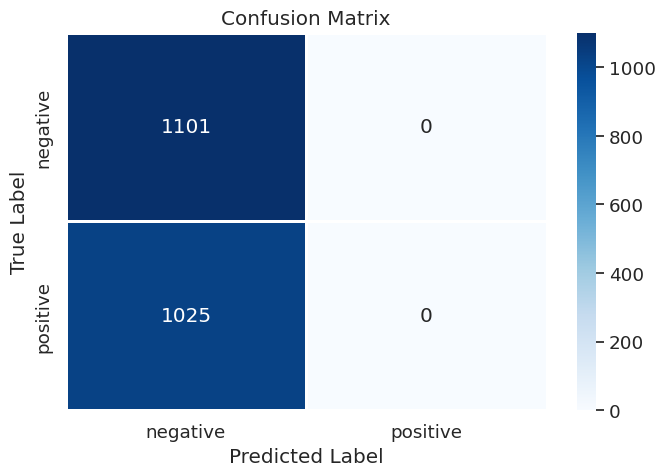

In [ ]:
# print confusion matrix 
ma.predictionAnalysis(predict_df, 'sentiment', 'bert_predict', fig_folder , 'bert_prediction_confusion_matrix')



---



### Training GPT Model

In [ ]:
# import gpt python script from the models module
from models import gpt2

* Tokenizing the inputs (x_train_set, x_validate_set):

In [ ]:
# Choosing the pre-trained GPT-2 model, tokenizer, and fast tokenizer

model, tokenizer, fast_tokenizer = gpt2.chooseTrained_Model_Tokenizer(config['gpt_training_model'])

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
# Encoding the training and validation sets using the GPT-2 tokenizer
x_train_set = gpt2.encoder(x_train_set.values, fast_tokenizer)
x_validate_set = gpt2.encoder(x_validate_set.values, fast_tokenizer)

* Building Model:

In [ ]:
# Building the GPT-2 model for training and printing its summary
model, checkpoint = gpt2.build_model_for_training(model, config['gpt_training_model'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_tokens (InputLay  [(None, 200)]            0         
 er)                                                             
                                                                 
 tfgpt2lm_head_model (TFGPT2  TFCausalLMOutputWithCros  124439808
 LMHeadModel)                sAttentions(loss=None, l            
                             ogits=(None, 200, 50257)            
                             , past_key_values=((2, N            
                             one, 12, 200, 64),                  
                              (2, None, 12, 200, 64),            
                              (2, None, 12, 200, 64),            
                              (2, None, 12, 200, 64),            
                              (2, None, 12, 200, 64),            
                              (2, None, 12, 200, 64),      

* Training Model and logging details:

In [ ]:
# get logger to log the values while training
logger = gpt2.getLogger()

* Training on 5 Epochs

In [ ]:
# train the model with epoch 5 and batch 32
gpt_hist_5 = model.fit(x_train_set,y_train_set, batch_size = 32 ,validation_data=(x_validate_set,y_validate_set),epochs = 5,  callbacks=[checkpoint])

Epoch 1/5
1085/1085 [==============================] - ETA: 0s - loss: 49.4594 - accuracy: 0.5035
Epoch 1: val_loss improved from inf to 30.27088, saving model to checkpoints/gpt/gpt_model_checkpoint.h5
1085/1085 [==============================] - 1001s 910ms/step - loss: 49.4594 - accuracy: 0.5035 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 2/5
1085/1085 [==============================] - ETA: 0s - loss: 49.4117 - accuracy: 0.5035
Epoch 2: val_loss did not improve from 30.27088
1085/1085 [==============================] - 934s 861ms/step - loss: 49.4117 - accuracy: 0.5035 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 3/5
1085/1085 [==============================] - ETA: 0s - loss: 49.3308 - accuracy: 0.5034
Epoch 3: val_loss did not improve from 30.27088
1085/1085 [==============================] - 953s 878ms/step - loss: 49.3308 - accuracy: 0.5034 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 4/5
1085/1085 [==============================] - ETA: 0s - loss: 49.8603 - accura

In [ ]:
# log the required information
gpt2.maintainlog(logger, gpt_hist_5)

INFO:training_logs:{'model_name': 'gpt2', 'accuracy': [0.5034719109535217, 0.5034719109535217, 0.5034431219100952, 0.5034719109535217, 0.5034719109535217], 'loss': [49.459373474121094, 49.411746978759766, 49.330833435058594, 49.86028289794922, 49.77252197265625], 'val_accuracy': [0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063], 'val_loss': [30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203]}


* Training on 10 Epochs

In [ ]:
# train the model with epoch 10 and batch 32
gpt_hist_10 = model.fit(x_train_set,y_train_set, batch_size = 32 ,validation_data=(x_validate_set,y_validate_set),epochs = 10,  callbacks=[checkpoint])

Epoch 1/10
1085/1085 [==============================] - ETA: 0s - loss: 49.5553 - accuracy: 0.5035
Epoch 1: val_loss did not improve from 30.27088
1085/1085 [==============================] - 953s 879ms/step - loss: 49.5553 - accuracy: 0.5035 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 2/10
1085/1085 [==============================] - ETA: 0s - loss: 49.5480 - accuracy: 0.5035
Epoch 2: val_loss did not improve from 30.27088
1085/1085 [==============================] - 934s 861ms/step - loss: 49.5480 - accuracy: 0.5035 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 3/10
1085/1085 [==============================] - ETA: 0s - loss: 49.4263 - accuracy: 0.5035
Epoch 3: val_loss did not improve from 30.27088
1085/1085 [==============================] - 953s 879ms/step - loss: 49.4263 - accuracy: 0.5035 - val_loss: 30.2709 - val_accuracy: 0.5008
Epoch 4/10
1085/1085 [==============================] - ETA: 0s - loss: 49.5357 - accuracy: 0.5035
Epoch 4: val_loss did not improve from 30.2

In [ ]:
# log the required information
gpt2.maintainlog(logger, gpt_hist_10)

INFO:training_logs:{'model_name': 'gpt2', 'accuracy': [0.5034719109535217, 0.5034719109535217, 0.5034719109535217, 0.5034719109535217, 0.5034431219100952, 0.5034719109535217, 0.5034719109535217, 0.5034719109535217, 0.5034719109535217, 0.5034431219100952], 'loss': [49.55526351928711, 49.54795455932617, 49.42631912231445, 49.53572463989258, 49.612674713134766, 49.59260940551758, 49.647491455078125, 49.75249481201172, 49.4093132019043, 49.70632553100586], 'val_accuracy': [0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063, 0.5008236169815063], 'val_loss': [30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203, 30.27088165283203]}


In [ ]:
# save the model
model.save("saved_models/gpt/gpt_model.h5")

* Analysis on Training:

In [ ]:
# import the model analysis script from the utils module
from utils import model_analysis as ma

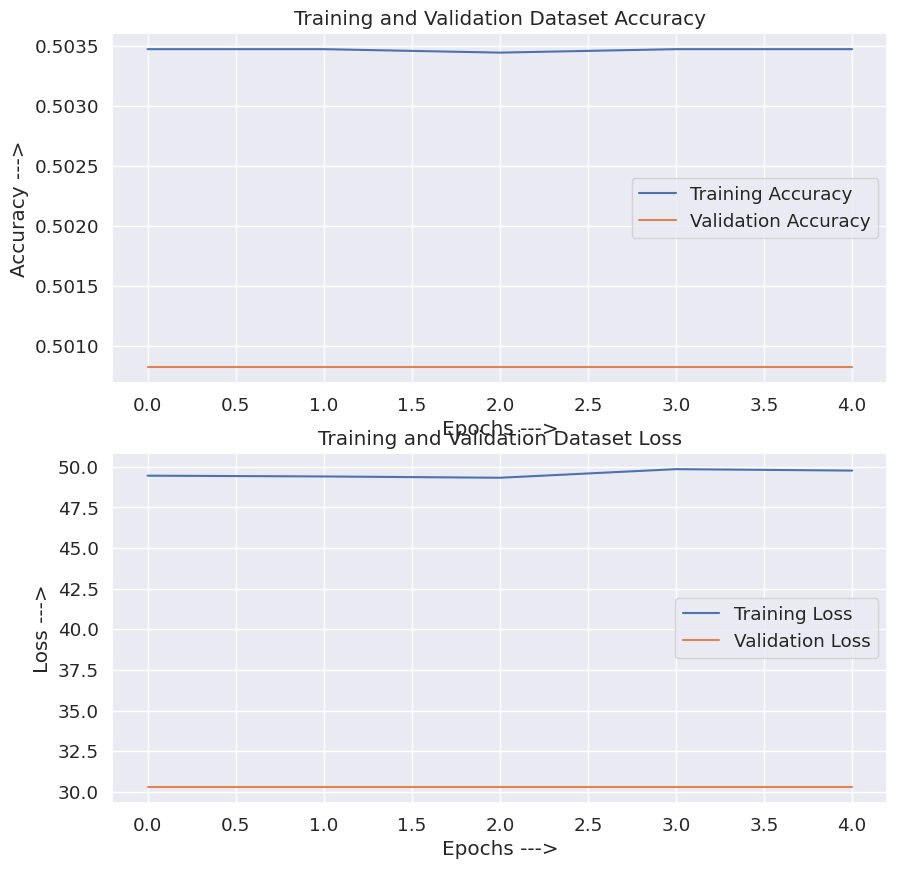

In [ ]:
# plot chart for training and accuracy
ma.plot_history(gpt_hist_5,fig_folder,  'gpt_AccuracyVsLoss_Epoch_5')

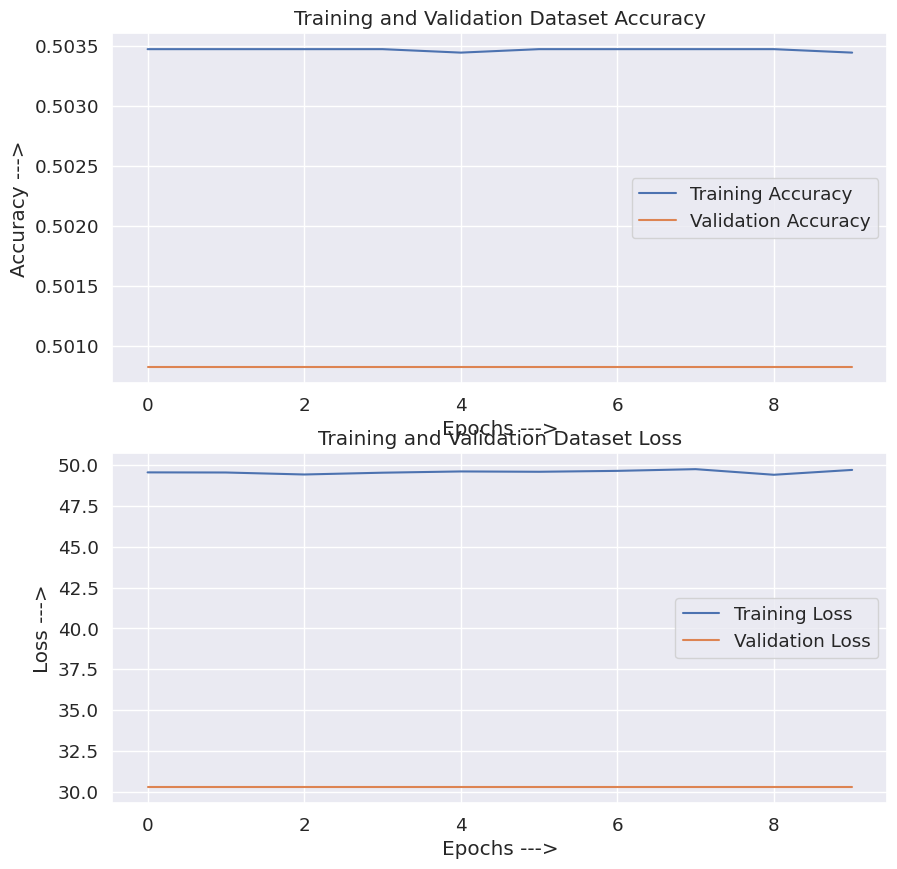

In [ ]:
# plot chart for training and accuracy
ma.plot_history(gpt_hist_10,fig_folder,  'gpt_AccuracyVsLoss_Epoch_10')

* Prediction:

In [ ]:
# predict the test set
pred = gpt2.predict(x_test_set, fast_tokenizer, model)

67/67 [==============================] - 44s 622ms/step


* Prediction Analysis:

In [ ]:
#print classification report
print(ma.getClassificationReport(y_test_set, pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1101
           1       0.48      1.00      0.65      1025

    accuracy                           0.48      2126
   macro avg       0.24      0.50      0.33      2126
weighted avg       0.23      0.48      0.31      2126



* passing df to get confusion matrix

In [ ]:
predict_df = test_set
predict_df['gpt_predict'] = pred

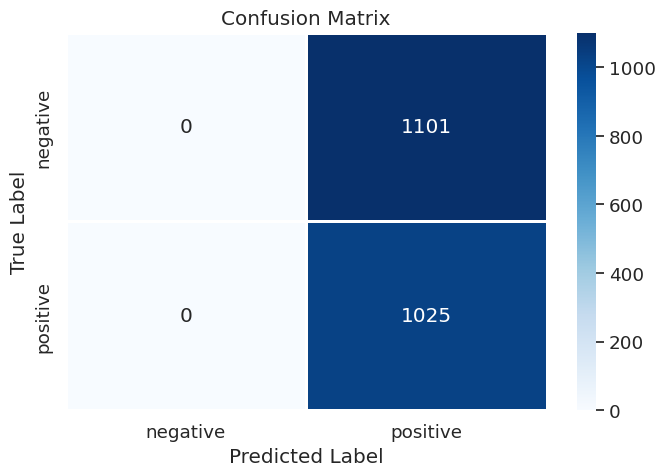

In [ ]:
# print confusion metric
ma.predictionAnalysis(predict_df, 'sentiment', 'gpt_predict', fig_folder, 'gpt_prediction_confusion_matrix')

### Train Custom Model

In [ ]:
# import the lstm script from the models module
from models import lstm

* Create Model

In [ ]:
# create model my passing the config for the model
model, checkpoint = lstm.create_model(config['lstm_training_model']['vocab_size'], config['lstm_training_model']['max_len'], config['lstm_training_model'] )

In [ ]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 550, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


* Get Token for the text

In [ ]:
 # conver the train and vlidate column to tokens
 x_train_set = lstm.convertTextTotoken(x_train_set, config['lstm_training_model'])
 x_validate_set = lstm.convertTextTotoken(x_validate_set, config['lstm_training_model'])

* Get logger

In [ ]:
# get logger
logger = lstm.getLogger()

* Training on 5 Epochs

In [ ]:
# train the lstm model on 5 epoch and batch of 32
lstm_hist_5 = lstm.train_model(model, x_train_set, y_train_set, x_validate_set, y_validate_set,5, 32 ,[checkpoint])

Epoch 1/5
782/782 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.8047
Epoch 1: val_loss improved from inf to 0.93088, saving model to checkpoints/lstm/lstm_model.h5
782/782 [==============================] - 2242s 3s/step - loss: 0.4287 - accuracy: 0.8047 - val_loss: 0.9309 - val_accuracy: 0.5122
Epoch 2/5
782/782 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.8474
Epoch 2: val_loss did not improve from 0.93088
782/782 [==============================] - 2201s 3s/step - loss: 0.3572 - accuracy: 0.8474 - val_loss: 1.0135 - val_accuracy: 0.5182
Epoch 3/5
782/782 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8572
Epoch 3: val_loss did not improve from 0.93088
782/782 [==============================] - 2192s 3s/step - loss: 0.3365 - accuracy: 0.8572 - val_loss: 1.2427 - val_accuracy: 0.5272
Epoch 4/5
782/782 [==============================] - ETA: 0s - loss: 0.3191 - accuracy: 0.8655
Epoch 4: val_loss did not improv

In [ ]:
# maintaing the log
lstm.maintainlog(logger,lstm_hist_5)

INFO:training_logs:{'model_name': 'lstm', 'accuracy': [0.8047199845314026, 0.8473600149154663, 0.8571599721908569, 0.8655200004577637, 0.8710399866104126], 'loss': [0.42871901392936707, 0.3571578860282898, 0.3365146517753601, 0.3190658688545227, 0.30309218168258667], 'val_accuracy': [0.5121999979019165, 0.5181999802589417, 0.5271999835968018, 0.5302000045776367, 0.5302000045776367], 'val_loss': [0.9308837056159973, 1.0134894847869873, 1.2427176237106323, 0.9912809729576111, 1.0976213216781616]}


In [ ]:
#lstm_hist_10 = lstm.train_model(model, x_train_set, y_train_set, x_validate_set, y_validate_set,2, 32 ,[checkpoint])
# maintain the log
#lstm.maintainlog(logger,lstm_hist_10)

In [ ]:
# save the model
model.save("saved_models/lstm/lstm_model.h5")

* Analysis on Training:

In [ ]:
# import model analysis script from the utils folder
from utils import model_analysis as ma

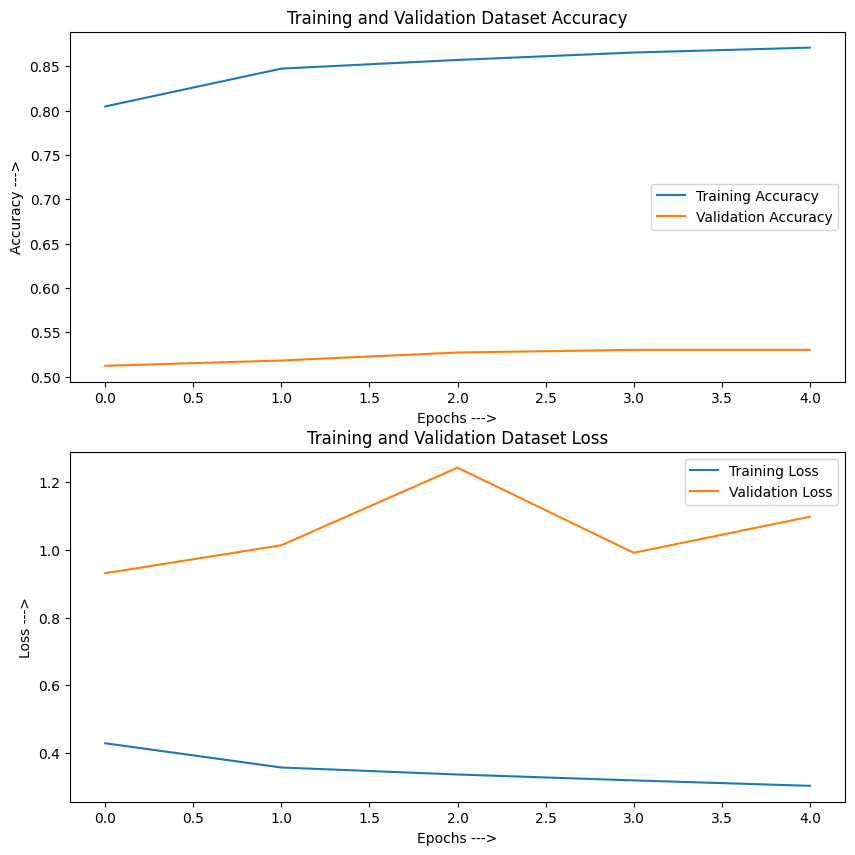

In [ ]:
# plot the line chart for training and validation dataset
ma.plot_history(lstm_hist_5,fig_folder,  'lstm_AccuracyVsLoss_Epoch_5')

* Prediction

In [ ]:
# get tokens from the model script file
x_test_set = lstm.convertTextTotoken(x_test_set, config['lstm_training_model'])

In [ ]:
# predict the test values from recent trained model
pred = lstm.predict(model, x_test_set)

67/67 [==============================] - 12s 183ms/step


* Prediction Analysis:

In [ ]:
# print classification report
print(ma.getClassificationReport(y_test_set, pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1101
           1       0.52      0.46      0.49      1025

    accuracy                           0.53      2126
   macro avg       0.53      0.53      0.53      2126
weighted avg       0.53      0.53      0.53      2126



* passing df to get confusion matrix

In [ ]:
predict_df = test_set
predict_df['lstm_predict'] = pred

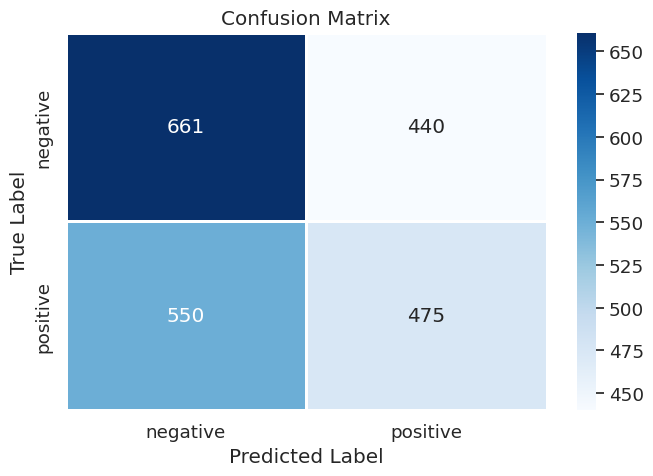

In [ ]:
# print confusion metric
ma.predictionAnalysis(predict_df, 'sentiment', 'lstm_predict', fig_folder, 'lstm_prediction_confusion_matrix')